In [1]:
# importing standard libraries
import os
import sys

# setting path
gparent = os.path.join(os.pardir)
sys.path.append(gparent)

# importing 3rd party libraries
from graphviz import Graph
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

## Pipeline Flowcharts

In [2]:
# Graph object
now = Graph('Current Pipeline', format='png')

# nodes
now.node('A', 'Data Source')
now.node('B', 'Power BI')
now.node('C', 'CSV')
now.node('D', 'Python Scripts')
now.node('E', 'Word Report')

# edges
now.edges(['AB', 'BC', 'CD', 'DE'])

# path
path = os.path.join(gparent,'figures', 'current_pipeline')

# chart
now.render(path)

'../figures/current_pipeline.png'

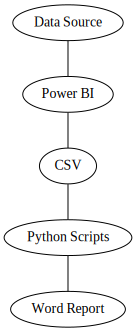

In [3]:
now

In [4]:
trans = Graph('Transition Pipeline', format='png')

# nodes
trans.node('A', 'Data Source')
trans.node('B', 'Power BI')
trans.node('C', 'CSV')
trans.node('D', 'Python Scripts')
trans.node('E', 'Tableau Dashboard')

# edges
trans.edges(['AB', 'BC', 'CD', 'DE'])

# path
path = os.path.join(gparent,'figures', 'transition_pipeline')

# chart
trans.render(path)

'../figures/transition_pipeline.png'

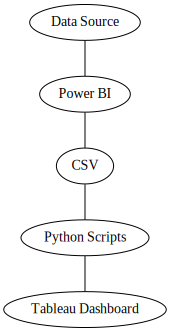

In [5]:
trans

In [6]:
final = Graph('Final Pipeline', format='png')

# nodes
final.node('A', 'Salesforce')
final.node('B', 'Python Scripts')
final.node('C', 'Tableau Dashboard')

# edges
final.edges(['AB', 'BC'])

# path
path = os.path.join(gparent, 'figures', 'final_pipeline')

# chart
final.render(path)

'../figures/final_pipeline.png'

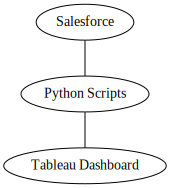

In [7]:
final

## EDA

In [8]:
path = os.path.join(gparent,'data', 'US_Regional_Sales_data.xlsx')

In [9]:
df = pd.read_excel(path)

In [10]:
df.head()

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,6,15,259,12,5,0.075,1963.1,1001.181
1,SO - 000102,Online,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-22,2018-07-02,USD,14,20,196,27,3,0.075,3939.6,3348.660
2,SO - 000103,Distributor,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-21,2018-07-01,USD,21,16,213,16,1,0.050,1775.5,781.220
3,SO - 000104,Wholesale,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-02,2018-06-07,USD,28,48,107,23,8,0.075,2324.9,1464.687
4,SO - 000105,Distributor,WARE-NMK1003,2018-04-10,2018-05-31,2018-06-16,2018-06-26,USD,22,49,111,26,8,0.100,1822.4,1476.144


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   OrderNumber       7991 non-null   object        
 1   Sales Channel     7991 non-null   object        
 2   WarehouseCode     7991 non-null   object        
 3   ProcuredDate      7991 non-null   datetime64[ns]
 4   OrderDate         7991 non-null   datetime64[ns]
 5   ShipDate          7991 non-null   datetime64[ns]
 6   DeliveryDate      7991 non-null   datetime64[ns]
 7   CurrencyCode      7991 non-null   object        
 8   _SalesTeamID      7991 non-null   int64         
 9   _CustomerID       7991 non-null   int64         
 10  _StoreID          7991 non-null   int64         
 11  _ProductID        7991 non-null   int64         
 12  Order Quantity    7991 non-null   int64         
 13  Discount Applied  7991 non-null   float64       
 14  Unit Price        7991 n

In [12]:
df['Unit Margin'] = df['Unit Price'] - df['Unit Cost']

In [13]:
df['Gross'] = df['Order Quantity']*df['Unit Price']

In [14]:
df['Net'] = df['Order Quantity']*df['Unit Margin']

In [15]:
df.head()

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost,Unit Margin,Gross,Net
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,6,15,259,12,5,0.075,1963.1,1001.181,961.919,9815.5,4809.595
1,SO - 000102,Online,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-22,2018-07-02,USD,14,20,196,27,3,0.075,3939.6,3348.660,590.940,11818.8,1772.820
2,SO - 000103,Distributor,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-21,2018-07-01,USD,21,16,213,16,1,0.050,1775.5,781.220,994.280,1775.5,994.280
3,SO - 000104,Wholesale,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-02,2018-06-07,USD,28,48,107,23,8,0.075,2324.9,1464.687,860.213,18599.2,6881.704
4,SO - 000105,Distributor,WARE-NMK1003,2018-04-10,2018-05-31,2018-06-16,2018-06-26,USD,22,49,111,26,8,0.100,1822.4,1476.144,346.256,14579.2,2770.048


In [16]:
print(df.OrderDate.max())
print(df.OrderDate.min())

2020-12-30 00:00:00
2018-05-31 00:00:00


In [17]:
gross_2018 = df[df['OrderDate'] < '2019']
cg18 = pd.DataFrame(gross_2018.groupby('OrderDate').sum()['Gross'].reset_index())
cg18['Cumulative Gross'] = cg18['Gross'].cumsum()

In [18]:
cg18.tail()

,OrderDate,Gross,Cumulative Gross
210,2018-12-27,75971.3,18786893.8
211,2018-12-28,79931.0,18866824.8
212,2018-12-29,111119.5,18977944.3
213,2018-12-30,224651.0,19202595.3
214,2018-12-31,90898.9,19293494.2


In [19]:
gross_2019 = df[(df['OrderDate'] > '2018-12-31') & (df['OrderDate'] < '2020')]
cg19 = pd.DataFrame(gross_2019.groupby('OrderDate').sum()['Gross'].reset_index())
cg19['Cumulative Gross'] = cg19['Gross'].cumsum()

In [20]:
cg19.tail()

,OrderDate,Gross,Cumulative Gross
360,2019-12-27,50564.9,31096147.2
361,2019-12-28,110590.2,31206737.4
362,2019-12-29,60869.5,31267606.9
363,2019-12-30,99696.0,31367302.9
364,2019-12-31,167486.6,31534789.5


In [21]:
gross_2020 = df[df['OrderDate'] > '2019-12-31']
cg20 = pd.DataFrame(gross_2020.groupby('OrderDate').sum()['Gross'].reset_index())
cg20['Cumulative Gross'] = cg20['Gross'].cumsum()

In [22]:
cg20.tail()

,OrderDate,Gross,Cumulative Gross
360,2020-12-26,77244.3,31414035.4
361,2020-12-27,133102.2,31547137.6
362,2020-12-28,183291.9,31730429.5
363,2020-12-29,75803.8,31806233.3
364,2020-12-30,58209.6,31864442.9


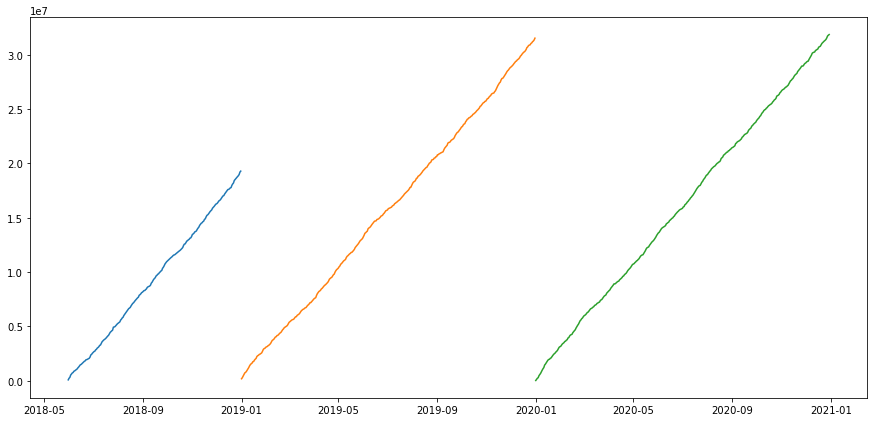

In [23]:
fig , axes = plt.subplots(figsize=(15,7))
ax1 = plt.plot('OrderDate', 'Cumulative Gross', data=cg18)
ax2 = plt.plot('OrderDate', 'Cumulative Gross', data=cg19)
ax3 = plt.plot('OrderDate', 'Cumulative Gross', data=cg20)
plt.show()

In [26]:
df.groupby('_SalesTeamID').sum().sort_values(by='Net', ascending=False)[['Order Quantity', 'Gross']].head()

,Order Quantity,Gross
_SalesTeamID,,
26,1391,3346569.6
13,1474,3242525.3
1,1366,3261359.0
8,1409,3228803.7
11,1318,3217192.6


In [25]:
df[df['_SalesTeamID'] == 26]['Order Quantity'].sum()

1391

In [24]:
df.loc[:, '_SalesTeamID'].value_counts().head()

13    340
18    316
8     315
12    314
7     303
Name: _SalesTeamID, dtype: int64

In [27]:
df.groupby('_SalesTeamID').sum().sort_values(by='Gross', ascending=False)[['Order Quantity', 'Net']].head()

,Order Quantity,Net
_SalesTeamID,,
26,1391,1251542.982
1,1366,1214764.873
13,1474,1217349.465
8,1409,1210697.571
11,1318,1210649.599
